# This is a the Test Simulation for OBAF Convective Core Stars

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
obaf_target_tab = Table.read('workspace/target_files/OBAF/TESS-CVZS_ConvectiveCore_SurveySims_targets.txt'
                         ,format='ascii')
obaf_target_tab

RA(decimal),DEC(decimal),cadence,type
float64,float64,int64,str2
100.09114996,-59.12320143,1,CC
73.375121,-66.924511,3,CC
98.5601612,-63.9181072,1,CC
75.78676533,-66.95969119,3,CC
100.6076854,-68.2685775,2,CC
82.4275267,-67.3465803,4,CC
82.2049008,-66.9934039,4,CC
99.9233696,-65.2744061,1,CC
96.80684084,-73.22835447,2,CC


In [3]:
obaf_cad_tab = Table.read('workspace/target_files/OBAF/TESS-CVZS_ConvectiveCore_SurveySims_cadences.txt'
                         ,format='ascii')
obaf_cad_tab

cadence,nepochs,delta[],softness[],lunation,instrument
int64,int64,str373,str279,float64,str6
1,20,"0,21,42,63,84,105,126,147,168,189,210,231,252,273,294,315,336,357,378,399","1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7",1.0,apogee
2,40,"0,0.02,21,0.02,42,0.02,63,0.02,84,0.02,105,0.02,126,0.02,147,0.02,168,0.02,189,0.02,210,0.02,231,0.02,252,0.02,273,0.02,294,0.02,315,0.02,336,0.02,357,0.02,378,0.02,399,0.02","1,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2,7,0.2",1.0,apogee
3,60,"0,0.02,0.02,21,0.02,0.02,42,0.02,0.02,63,0.02,0.02,84,0.02,0.02,105,0.02,0.02,126,0.02,0.02,147,0.02,0.02,168,0.02,0.02,189,0.02,0.02,210,0.02,0.02,231,0.02,0.02,252,0.02,0.02,273,0.02,0.02,294,0.02,0.02,315,0.02,0.02,336,0.02,0.02,357,0.02,0.02,378,0.02,0.02,399,0.02,0.02","1,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2,7,0.2,0.2",1.0,apogee
4,80,"0,0.02,0.02,0.02,21,0.02,0.02,0.02,42,0.02,0.02,0.02,63,0.02,0.02,0.02,84,0.02,0.02,0.02,105,0.02,0.02,0.02,126,0.02,0.02,0.02,147,0.02,0.02,0.02,168,0.02,0.02,0.02,189,0.02,0.02,0.02,210,0.02,0.02,0.02,231,0.02,0.02,0.02,252,0.02,0.02,0.02,273,0.02,0.02,0.02,294,0.02,0.02,0.02,315,0.02,0.02,0.02,336,0.02,0.02,0.02,357,0.02,0.02,0.02,378,0.02,0.02,0.02,399,0.02,0.02,0.02","1,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2,7,0.2,0.2,0.2",1.0,apogee


## Plot stars

/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


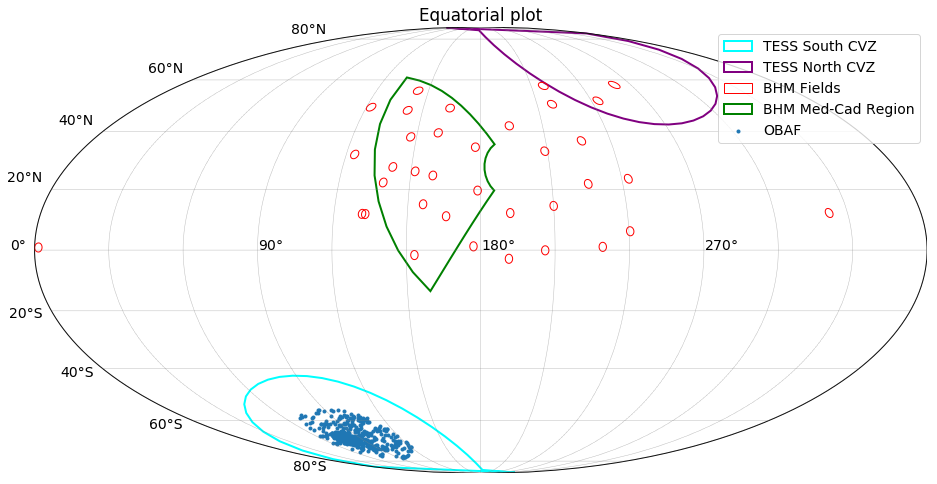

In [4]:
plt.rcParams.update({'font.size': 14})

(fig,bmap) = testfield_fk5()
#Plot Planet Targets
xplan,yplan = bmap(obaf_target_tab['RA(decimal)'],obaf_target_tab['DEC(decimal)'])
bmap.scatter(xplan,yplan,marker='.',label='OBAF',alpha=1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [5]:
target_tab = Table()

In [6]:
cadence_list = ["cc_exp{:.0f}".format(x) for x in obaf_target_tab['cadence']]
print(cadence_list[0:20])

['cc_exp1', 'cc_exp3', 'cc_exp1', 'cc_exp3', 'cc_exp2', 'cc_exp4', 'cc_exp4', 'cc_exp1', 'cc_exp2', 'cc_exp4', 'cc_exp1', 'cc_exp4', 'cc_exp4', 'cc_exp3', 'cc_exp4', 'cc_exp1', 'cc_exp1', 'cc_exp4', 'cc_exp3', 'cc_exp1']


In [7]:
target_tab['ra'] = obaf_target_tab['RA(decimal)']
target_tab['dec'] = obaf_target_tab['DEC(decimal)']
target_tab['cadence'] = cadence_list
target_tab['type'] = np.repeat('CC',len(obaf_target_tab))
target_tab['priority'] = np.repeat(np.array(25,dtype='int32'),len(obaf_target_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(obaf_target_tab))

In [8]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str7,str2,int32,float32
100.09114996,-59.12320143,cc_exp1,CC,25,1.0
73.375121,-66.924511,cc_exp3,CC,25,1.0
98.5601612,-63.9181072,cc_exp1,CC,25,1.0
75.78676533,-66.95969119,cc_exp3,CC,25,1.0
100.6076854,-68.2685775,cc_exp2,CC,25,1.0
82.4275267,-67.3465803,cc_exp4,CC,25,1.0
82.2049008,-66.9934039,cc_exp4,CC,25,1.0
99.9233696,-65.2744061,cc_exp1,CC,25,1.0
96.80684084,-73.22835447,cc_exp2,CC,25,1.0


In [9]:
target_tab.write('fps_TESS_OBAF_target.fits',overwrite=True)

## Create Cadence Table

In [10]:
cadence_tab = Table()

In [11]:
cadence_tab['cadence'] = ["cc_exp{:.0f}".format(x) for x in obaf_cad_tab['cadence']]
cadence_tab['nepochs'] = obaf_cad_tab['nepochs']
cadence_tab

cadence,nepochs
str7,int64
cc_exp1,20
cc_exp2,40
cc_exp3,60
cc_exp4,80


In [12]:
#Make all the deltas size 80
delta0 = obaf_cad_tab['delta[]'][0].split(',')
delta0.extend(np.repeat(np.nan,60))
delta1 = obaf_cad_tab['delta[]'][1].split(',')
delta1.extend(np.repeat(np.nan,40))
delta2 = obaf_cad_tab['delta[]'][2].split(',')
delta2.extend(np.repeat(np.nan,20))
delta3 = obaf_cad_tab['delta[]'][3].split(',')
delta = np.array([delta0,delta1,delta2,delta3],dtype='float32')
delta[(delta > 0.019) & (delta < 0.021)] = 0.0 #Make all the deltas 0 for back to back exposures
print(delta)
cadence_tab['delta'] = delta
cadence_tab

[[   0.   21.   42.   63.   84.  105.  126.  147.  168.  189.  210.  231.
   252.  273.  294.  315.  336.  357.  378.  399.   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan]
 [   0.    0.   21.    0.   42.    0.   63.    0.   84.    0.  105.    0.
   126.    0.  147.    0.  168.    0.  189.    0.  210.    0.  231.    0.
   252.    0.  273.    0.  294.    0.  315.    0.  336.    0.  357.    0.
   378.    0.  399.    0.   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan]
 [   0.   

/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


cadence,nepochs,delta [80]
str7,int64,float32
cc_exp1,20,0.0 .. nan
cc_exp2,40,0.0 .. nan
cc_exp3,60,0.0 .. nan
cc_exp4,80,0.0 .. 0.0


In [13]:
#Make all the softnesss size 80
softness0 = obaf_cad_tab['softness[]'][0].split(',')
softness0.extend(np.repeat(np.nan,60))
softness1 = obaf_cad_tab['softness[]'][1].split(',')
softness1.extend(np.repeat(np.nan,40))
softness2 = obaf_cad_tab['softness[]'][2].split(',')
softness2.extend(np.repeat(np.nan,20))
softness3 = obaf_cad_tab['softness[]'][3].split(',')
softness = np.array([softness0,softness1,softness2,softness3],dtype='float32')
print(softness)
cadence_tab['softness'] = softness
cadence_tab

[[ 1.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.   7.
   7.   7.   7.   7.   7.   nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [ 1.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.
   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2
   7.   0.2  7.   0.2  7.   0.2  7.   0.2  7.   0.2  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan]
 [ 1.   0.2  0.2  7.   0.2  0.2  7.   0.2  0.2  7.   0.2  0.2  7.   0.2
   0.2  7.   0.2  0.2  7.   0.2  0.2  7.   0.2  0.2  7.   0.2  0.2  7.   0.2
   0.2  7.   0.2  0.2  7.  

cadence,nepochs,delta [80],softness [80]
str7,int64,float32,float32
cc_exp1,20,0.0 .. nan,1.0 .. nan
cc_exp2,40,0.0 .. nan,1.0 .. nan
cc_exp3,60,0.0 .. nan,1.0 .. nan
cc_exp4,80,0.0 .. 0.0,1.0 .. 0.2


In [14]:
#Make all the lunations size 80
lunation0 = np.concatenate((np.repeat(1.0,20),np.repeat(np.nan,60)))
lunation1 = np.concatenate((np.repeat(1.0,40),np.repeat(np.nan,40)))
lunation2 = np.concatenate((np.repeat(1.0,60),np.repeat(np.nan,20)))
lunation3 = np.repeat(1.0,80)
lunation = np.array([lunation0,lunation1,lunation2,lunation3],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation
cadence_tab

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1

cadence,nepochs,delta [80],softness [80],lunation [80]
str7,int64,float32,float32,float32
cc_exp1,20,0.0 .. nan,1.0 .. nan,1.0 .. nan
cc_exp2,40,0.0 .. nan,1.0 .. nan,1.0 .. nan
cc_exp3,60,0.0 .. nan,1.0 .. nan,1.0 .. nan
cc_exp4,80,0.0 .. 0.0,1.0 .. 0.2,1.0 .. 1.0


In [15]:
#Make all the instruments size 80
instrument0 = np.concatenate((np.repeat('apogee',20),np.repeat(np.nan,60)))
instrument1 = np.concatenate((np.repeat('apogee',40),np.repeat(np.nan,40)))
instrument2 = np.concatenate((np.repeat('apogee',60),np.repeat(np.nan,20)))
instrument3 = np.repeat('apogee',80)
instrument = np.array([instrument0,instrument1,instrument2,instrument3])
print(instrument)
cadence_tab['instrument'] = instrument
cadence_tab

[['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'

cadence,nepochs,delta [80],softness [80],lunation [80],instrument [80]
str7,int64,float32,float32,float32,str32
cc_exp1,20,0.0 .. nan,1.0 .. nan,1.0 .. nan,apogee .. nan
cc_exp2,40,0.0 .. nan,1.0 .. nan,1.0 .. nan,apogee .. nan
cc_exp3,60,0.0 .. nan,1.0 .. nan,1.0 .. nan,apogee .. nan
cc_exp4,80,0.0 .. 0.0,1.0 .. 0.2,1.0 .. 1.0,apogee .. apogee


In [16]:
cadence_tab.write('fps_TESS_OBAF_cadence.fits',overwrite=True)

In [17]:
test =  Table.read('fps_TESS_OBAF_cadence.fits')
test

cadence,nepochs,delta [80],softness [80],lunation [80],instrument [80]
bytes7,int64,float32,float32,float32,bytes128
cc_exp1,20,0.0 .. nan,1.0 .. nan,1.0 .. nan,apogee .. nan
cc_exp2,40,0.0 .. nan,1.0 .. nan,1.0 .. nan,apogee .. nan
cc_exp3,60,0.0 .. nan,1.0 .. nan,1.0 .. nan,apogee .. nan
cc_exp4,80,0.0 .. 0.0,1.0 .. 0.2,1.0 .. 1.0,apogee .. apogee
